
**Model_2**

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from IPython.display import Image

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
path = "/content/drive/Shareddrives/Colab Notebooks/CNN_papaya_aug" 
data_dir = pathlib.Path(path)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2334


In [ ]:
ripe_count = len(list(data_dir.glob('Ripe/*'))) 
medium_count = len(list(data_dir.glob('Medium/*'))) 
unripe_count = len(list(data_dir.glob('Unripe/*'))) 
print("ripe {}, medium {}, unripe {}".format(ripe_count,medium_count,unripe_count))

ripe 778, medium 778, unripe 778


In [ ]:
# Unripe = list(data_dir.glob('Unripe/*')) 
# PIL.Image.open(str(Unripe[1]))

In [ ]:
batch_size = int(image_count*0.2)
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 2334 files belonging to 3 classes.
Using 1868 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 2334 files belonging to 3 classes.
Using 466 files for validation.


In [ ]:
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   break

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Medium', 'Ripe', 'Unripe']


In [ ]:
# plt.figure(figsize=(7, 7))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9432189


In [ ]:
num_classes = 3

model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
# layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs=12
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/12
5/5 [==============================] - 110s 18s/step - loss: 1.3348 - accuracy: 0.3276 - val_loss: 1.1003 - val_accuracy: 0.3433
Epoch 2/12
5/5 [==============================] - 99s 16s/step - loss: 0.9366 - accuracy: 0.4261 - val_loss: 0.6510 - val_accuracy: 0.7189
Epoch 3/12
5/5 [==============================] - 106s 18s/step - loss: 0.5495 - accuracy: 0.7596 - val_loss: 0.3722 - val_accuracy: 0.8369
Epoch 4/12
5/5 [==============================] - 101s 16s/step - loss: 0.3616 - accuracy: 0.8378 - val_loss: 0.3556 - val_accuracy: 0.8369
Epoch 5/12
5/5 [==============================] - 99s 17s/step - loss: 0.2836 - accuracy: 0.8769 - val_loss: 0.4797 - val_accuracy: 0.8112
Epoch 6/12
5/5 [==============================] - 100s 17s/step - loss: 0.2820 - accuracy: 0.8774 - val_loss: 0.2811 - val_accuracy: 0.8755
Epoch 7/12
5/5 [==============================] - 99s 16s/step - loss: 0.1944 - accuracy: 0.9197 - val_loss: 0.1292 - val_accuracy: 0.9506
Epoch 8/12
5/5 [=======

In [ ]:
loss, acc = model.evaluate(val_ds, verbose=2)
print("model, accuracy: {:5.2f}%".format(100 * acc))

1/1 - 14s - loss: 0.1128 - accuracy: 0.9528 - 14s/epoch - 14s/step
model, accuracy: 95.28%


In [ ]:
#model.save('/content/drive/Shareddrives/Colab Notebooks/model02.h5')
model.save('model.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --output_format=tfjs_graph_model --input_format keras model.h5 model

In [ ]:
!zip -r model.zip model

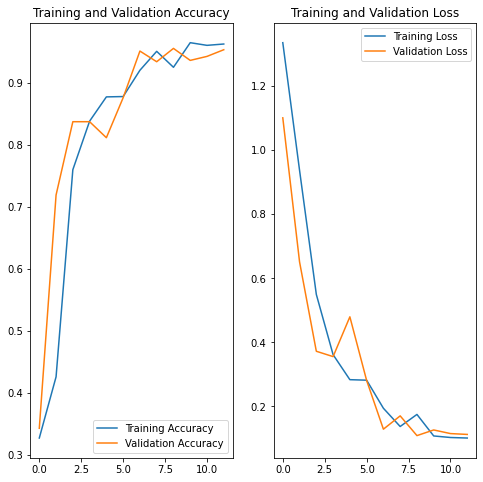

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

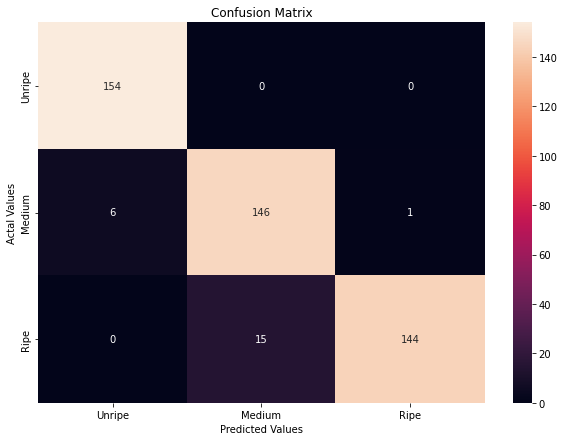

In [ ]:
import numpy as np
classes=['Unripe','Medium', 'Ripe']
cm=[[0,0,0],[0,0,0],[0,0,0]]

for images, labels in val_ds.take(1):
  for i in range(batch_size):
    img = images[i]
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    cm[classes.index(class_names[labels[i]])][classes.index(class_names[np.argmax(score)])]+=1
    # print("Predited",class_names[np.argmax(score)],"Actual",class_names[labels[i]])

# print(np.matrix(cm))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = cm
df_cm = pd.DataFrame(array, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm,annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# ncm=[[0,0,0],[0,0,0],[0,0,0]]
# for y in range(3):
#   for x in range(3):
#     total=cm[y][0]+cm[y][1]+cm[y][2]
#     if(total==0):
#       total=1
#     ncm[y][x]=cm[y][x]/total

# array = ncm
# df_cm = pd.DataFrame(array, index = classes,
#                   columns = classes)
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm,annot=True, fmt='g')
# plt.title('Normalized Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

In [ ]:
path = "/content/drive/Shareddrives/Colab Notebooks/papaya_test/r1.jpg"

img = keras.preprocessing.image.load_img(path, target_size=(180, 180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
  "This is {} papaya with a {:.2f} % confidence."
  .format(class_names[np.argmax(score)], 100 * np.max(score)))


In [ ]:
# def predict_image(img):
#   img_array = keras.preprocessing.image.img_to_array(img)
#   img_array = tf.expand_dims(img_array, 0)
#   predictions = model.predict(img_array)
#   score = tf.nn.softmax(predictions[0])
#   return ("This is {} papaya with a {:.2f} % confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))


In [ ]:
# image = gr.inputs.Image(shape=(180,180))

# gr.Interface(fn=predict_image, inputs=image, outputs="text", capture_session=True).launch(debug='True')